# Modelo - Série temporal temperature change

# Importação das bibliotecas

In [1]:
# Versão do python

from platform import python_version

print('Versão python neste Jupyter Notebook:', python_version())

Versão python neste Jupyter Notebook: 3.9.7


In [2]:
# Importação das bibliotecas 

# Pandas carregamento csv
import pandas as pd 

# Numpy para carregamento cálculos em arrays multidimensionais
import numpy as np 

# Visualização de dados
import seaborn as sns
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Carregar as versões das bibliotecas
import watermark

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Versões das bibliotecas

%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

Author: Versões das bibliotecas

seaborn   : 0.11.2
pandas    : 1.3.4
watermark : 2.3.0
plotly    : 5.5.0
matplotlib: 3.4.3
numpy     : 1.20.3



In [4]:
# Configuração para os gráficos largura e layout dos graficos

plt.rcParams["figure.figsize"] = (25, 20)

plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

m.rcParams['axes.labelsize'] = 25
m.rcParams['xtick.labelsize'] = 25
m.rcParams['ytick.labelsize'] = 25
m.rcParams['text.color'] = 'k'

In [22]:
# Base
df = pd.read_csv("FAOSTAT_data_1-10-2022.csv")
ds = pd.read_csv("Environment_Temperature_change_E_All_Data_NOFLAG.csv", encoding='latin-1')

In [6]:
# Exibido 5 primeiros dados

df.head()

Domain Code              Domain  Area Code (FAO)         Area  Element Code             Element  Months Code   Months  Year Code  Year Unit  Value Flag Flag Description
0          ET  Temperature change                2  Afghanistan          7271  Temperature change         7001  January       1961  1961   ?C  0.746   Fc  Calculated data
1          ET  Temperature change                2  Afghanistan          7271  Temperature change         7001  January       1962  1962   ?C  0.009   Fc  Calculated data
2          ET  Temperature change                2  Afghanistan          7271  Temperature change         7001  January       1963  1963   ?C  2.695   Fc  Calculated data
3          ET  Temperature change                2  Afghanistan          7271  Temperature change         7001  January       1964  1964   ?C -5.277   Fc  Calculated data
4          ET  Temperature change                2  Afghanistan          7271  Temperature change         7001  January       1965  1965   ?C  1.827   Fc  Calculated data

In [7]:
# Exibido 5 últimos dados 

df.tail()

Domain Code              Domain  Area Code (FAO)      Area  Element Code             Element  Months Code               Months  Year Code  Year Unit  Value Flag Flag Description
229920          ET  Temperature change              181  Zimbabwe          7271  Temperature change         7020  Meteorological year       2016  2016   ?C  1.470   Fc  Calculated data
229921          ET  Temperature change              181  Zimbabwe          7271  Temperature change         7020  Meteorological year       2017  2017   ?C  0.443   Fc  Calculated data
229922          ET  Temperature change              181  Zimbabwe          7271  Temperature change         7020  Meteorological year       2018  2018   ?C  0.747   Fc  Calculated data
229923          ET  Temperature change              181  Zimbabwe          7271  Temperature change         7020  Meteorological year       2019  2019   ?C  1.359   Fc  Calculated data
229924          ET  Temperature change              181  Zimbabwe          7271  Temperature change         7020  Meteorological year       2020  2020   ?C  0.820   Fc  Calculated data

In [23]:
ds.head()

Area Code         Area  Months Code    Months  Element Code             Element Unit  Y1961  Y1962  Y1963  Y1964  Y1965  Y1966  Y1967  Y1968  Y1969  Y1970  Y1971  Y1972  Y1973  Y1974  Y1975  Y1976  Y1977  Y1978  Y1979  Y1980  Y1981  Y1982  Y1983  Y1984  Y1985  Y1986  Y1987  Y1988  Y1989  Y1990  Y1991  Y1992  Y1993  Y1994  Y1995  Y1996  Y1997  Y1998  Y1999  Y2000  Y2001  Y2002  Y2003  Y2004  Y2005  Y2006  Y2007  Y2008  Y2009  Y2010  Y2011  Y2012  Y2013  Y2014  Y2015  Y2016  Y2017  Y2018  Y2019
0          2  Afghanistan         7001   January          7271  Temperature change   °C  0.777  0.062  2.744 -5.232  1.868  3.629 -1.432  0.389 -2.298  0.804 -1.487 -1.305 -2.951 -1.184 -0.490  2.409 -3.014 -0.663  1.141 -0.393  1.724  0.678  0.524 -0.058  0.435  0.332  2.655  1.150 -1.108  0.634  0.018  0.582 -0.821  1.087  1.297 -0.718  1.426  0.950  0.859  1.565 -0.603  1.606  2.479  2.707  0.109 -1.606  0.431 -5.553  1.518  3.601  1.179 -0.583  1.233  1.755  1.943  3.416  1.201  1.996  2.951
1          2  Afghanistan         7001   January          6078  Standard Deviation   °C  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950
2          2  Afghanistan         7002  February          7271  Temperature change   °C -1.743  2.465  3.919 -0.202 -0.096  3.397  0.296 -2.055 -3.167  1.809  0.816 -7.722  1.838 -3.706 -1.239 -1.620 -0.156 -0.369  1.072 -1.222  1.088 -2.101  0.460 -4.321  2.467 -0.286  1.409  0.170 -2.890 -0.310 -1.373 -0.120  1.414 -1.412 -0.149  0.870  0.043 -0.540  3.222 -0.901  0.707  0.985  1.816  2.871 -1.506  4.725  1.645 -2.332  2.494  1.212  0.321 -3.201  1.494 -3.187  2.699  2.251 -0.323  2.705  0.086
3          2  Afghanistan         7002  February          6078  Standard Deviation   °C  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597
4          2  Afghanistan         7003     March          7271  Temperature change   °C  0.516  1.336  0.403  1.659 -0.909 -0.069 -0.759  0.496  2.481 -0.915  1.658 -1.784 -0.473  1.001 -0.585 -2.817  3.377 -1.536 -1.420 -0.628  1.166 -1.781 -2.406  1.761 -0.160 -3.087  1.330 -0.056  0.065 -1.000 -0.901 -2.220 -1.449  1.312 -1.451 -0.336 -0.005 -0.576 -0.217 -0.267  1.229  1.949 -0.158  2.753  1.663  1.847 -0.201  4.172  2.362  3.390  0.748 -0.527  2.246 -0.076 -0.497  2.296  0.834  4.418  0.234

In [8]:
# Número de linhas e colunas

df.shape

(229925, 14)

In [9]:
# Verificando informações das variaveis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229925 entries, 0 to 229924
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       229925 non-null  object 
 1   Domain            229925 non-null  object 
 2   Area Code (FAO)   229925 non-null  int64  
 3   Area              229925 non-null  object 
 4   Element Code      229925 non-null  int64  
 5   Element           229925 non-null  object 
 6   Months Code       229925 non-null  int64  
 7   Months            229925 non-null  object 
 8   Year Code         229925 non-null  int64  
 9   Year              229925 non-null  int64  
 10  Unit              229925 non-null  object 
 11  Value             222012 non-null  float64
 12  Flag              229925 non-null  object 
 13  Flag Description  229925 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 24.6+ MB


In [10]:
# Exibido tipos de dados

df.dtypes

Domain Code          object
Domain               object
Area Code (FAO)       int64
Area                 object
Element Code          int64
Element              object
Months Code           int64
Months               object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object

In [12]:
# Total de colunas e linhas 

print("Números de linhas: {}" .format(df.shape[0]))
print("Números de colunas: {}" .format(df.shape[1]))

Números de linhas: 229925
Números de colunas: 14


In [13]:
# Exibindo valores ausentes e valores únicos

print("\nMissing values :  ", df.isnull().sum().values.sum())
print("\nUnique values :  \n",df.nunique())


Missing values :   7913

Unique values :  
 Domain Code            1
Domain                 1
Area Code (FAO)      247
Area                 247
Element Code           1
Element                1
Months Code           17
Months                17
Year Code             60
Year                  60
Unit                   1
Value               8457
Flag                   2
Flag Description       2
dtype: int64


In [14]:
# Sum() Retorna a soma dos valores sobre o eixo solicitado
# Isna() Detecta valores ausentes

df.isna().sum()

Domain Code            0
Domain                 0
Area Code (FAO)        0
Area                   0
Element Code           0
Element                0
Months Code            0
Months                 0
Year Code              0
Year                   0
Unit                   0
Value               7913
Flag                   0
Flag Description       0
dtype: int64

In [15]:
# Retorna a soma dos valores sobre o eixo solicitado
# Detecta valores não ausentes para um objeto semelhante a uma matriz.

df.notnull().sum()

Domain Code         229925
Domain              229925
Area Code (FAO)     229925
Area                229925
Element Code        229925
Element             229925
Months Code         229925
Months              229925
Year Code           229925
Year                229925
Unit                229925
Value               222012
Flag                229925
Flag Description    229925
dtype: int64

In [16]:
# Total de número duplicados

df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
229920    False
229921    False
229922    False
229923    False
229924    False
Length: 229925, dtype: bool

In [17]:
# Exibindo estatísticas descritivas visualizar alguns detalhes estatísticos básicos como percentil, média, padrão, etc. 
# De um quadro de dados ou uma série de valores numéricos.

df.describe().T

count         mean        std       min       25%       50%       75%       max
Area Code (FAO)  229925.0   130.647689  76.809008     1.000    64.000   131.000   194.000   351.000
Element Code     229925.0  7271.000000   0.000000  7271.000  7271.000  7271.000  7271.000  7271.000
Months Code      229925.0  7009.882353   6.037955  7001.000  7005.000  7009.000  7016.000  7020.000
Year Code        229925.0  1991.306248  17.333252  1961.000  1976.000  1992.000  2006.000  2020.000
Year             229925.0  1991.306248  17.333252  1961.000  1976.000  1992.000  2006.000  2020.000
Value            222012.0     0.492626   1.036364    -9.303    -0.071     0.414     0.999    11.759

In [24]:
ds

Area Code         Area  Months Code               Months  Element Code             Element Unit  Y1961  Y1962  Y1963  Y1964  Y1965  Y1966  Y1967  Y1968  Y1969  Y1970  Y1971  Y1972  Y1973  Y1974  Y1975  Y1976  Y1977  Y1978  Y1979  Y1980  Y1981  Y1982  Y1983  Y1984  Y1985  Y1986  Y1987  Y1988  Y1989  Y1990  Y1991  Y1992  Y1993  Y1994  Y1995  Y1996  Y1997  Y1998  Y1999  Y2000  Y2001  Y2002  Y2003  Y2004  Y2005  Y2006  Y2007  Y2008  Y2009  Y2010  Y2011  Y2012  Y2013  Y2014  Y2015  Y2016  Y2017  Y2018  Y2019
0             2  Afghanistan         7001              January          7271  Temperature change   °C  0.777  0.062  2.744 -5.232  1.868  3.629 -1.432  0.389 -2.298  0.804 -1.487 -1.305 -2.951 -1.184 -0.490  2.409 -3.014 -0.663  1.141 -0.393  1.724  0.678  0.524 -0.058  0.435  0.332  2.655  1.150 -1.108  0.634  0.018  0.582 -0.821  1.087  1.297 -0.718  1.426  0.950  0.859  1.565 -0.603  1.606  2.479  2.707  0.109 -1.606  0.431 -5.553  1.518  3.601  1.179 -0.583  1.233  1.755  1.943  3.416  1.201  1.996  2.951
1             2  Afghanistan         7001              January          6078  Standard Deviation   °C  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950  1.950
2             2  Afghanistan         7002             February          7271  Temperature change   °C -1.743  2.465  3.919 -0.202 -0.096  3.397  0.296 -2.055 -3.167  1.809  0.816 -7.722  1.838 -3.706 -1.239 -1.620 -0.156 -0.369  1.072 -1.222  1.088 -2.101  0.460 -4.321  2.467 -0.286  1.409  0.170 -2.890 -0.310 -1.373 -0.120  1.414 -1.412 -0.149  0.870  0.043 -0.540  3.222 -0.901  0.707  0.985  1.816  2.871 -1.506  4.725  1.645 -2.332  2.494  1.212  0.321 -3.201  1.494 -3.187  2.699  2.251 -0.323  2.705  0.086
3             2  Afghanistan         7002             February          6078  Standard Deviation   °C  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597  2.597
4             2  Afghanistan         7003                March          7271  Temperature change   °C  0.516  1.336  0.403  1.659 -0.909 -0.069 -0.759  0.496  2.481 -0.915  1.658 -1.784 -0.473  1.001 -0.585 -2.817  3.377 -1.536 -1.420 -0.628  1.166 -1.781 -2.406  1.761 -0.160 -3.087  1.330 -0.056  0.065 -1.000 -0.901 -2.220 -1.449  1.312 -1.451 -0.336 -0.005 -0.576 -0.217 -0.267  1.229  1.949 -0.158  2.753  1.663  1.847 -0.201  4.172  2.362  3.390  0.748 -0.527  2.246 -0.076 -0.497  2.296  0.834  4.418  0.234
...         ...          ...          ...                  ...           ...                 ...  ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...
9651       5873         OECD         7018          JunJulAug          6078  Standard Deviation   °C  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.247  0.24

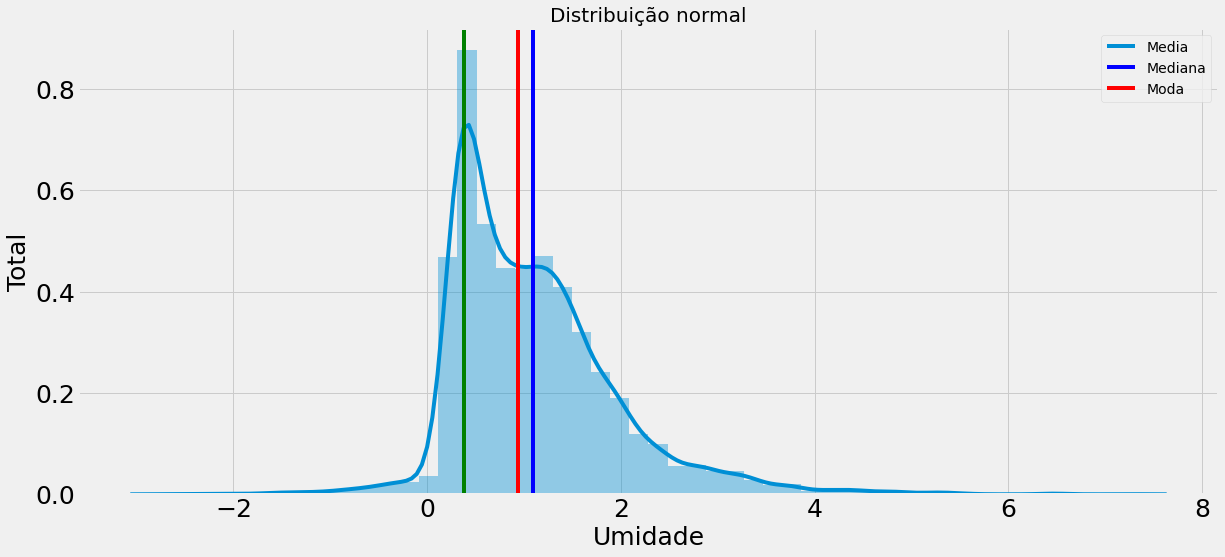

In [25]:
# Gráfico distribuição normal
plt.figure(figsize=(18.2, 8))

ax = sns.distplot(ds['Y2019']);
plt.title("Distribuição normal", fontsize=20)
plt.xlabel("Umidade")
plt.ylabel("Total")
plt.axvline(ds['Y2019'].mean(), color='b')
plt.axvline(ds['Y2019'].median(), color='r')
plt.axvline(ds['Y2019'].mode()[0], color='g');
plt.legend(["Media", "Mediana", "Moda"])
plt.show()

In [26]:
# Matriz correlação de pares de colunas, excluindo NA / valores nulos.
df.corr()

Area Code (FAO)  Element Code   Months Code     Year Code          Year     Value
Area Code (FAO)     1.000000e+00           NaN  4.744586e-12  2.192979e-02  2.192979e-02  0.011510
Element Code                 NaN           NaN           NaN           NaN           NaN       NaN
Months Code         4.744586e-12           NaN  1.000000e+00  3.014250e-14  3.014250e-14 -0.012527
Year Code           2.192979e-02           NaN  3.014250e-14  1.000000e+00  1.000000e+00  0.433654
Year                2.192979e-02           NaN  3.014250e-14  1.000000e+00  1.000000e+00  0.433654
Value               1.151000e-02           NaN -1.252694e-02  4.336544e-01  4.336544e-01  1.000000

Text(0.5, 1.0, 'Matriz de correlação')

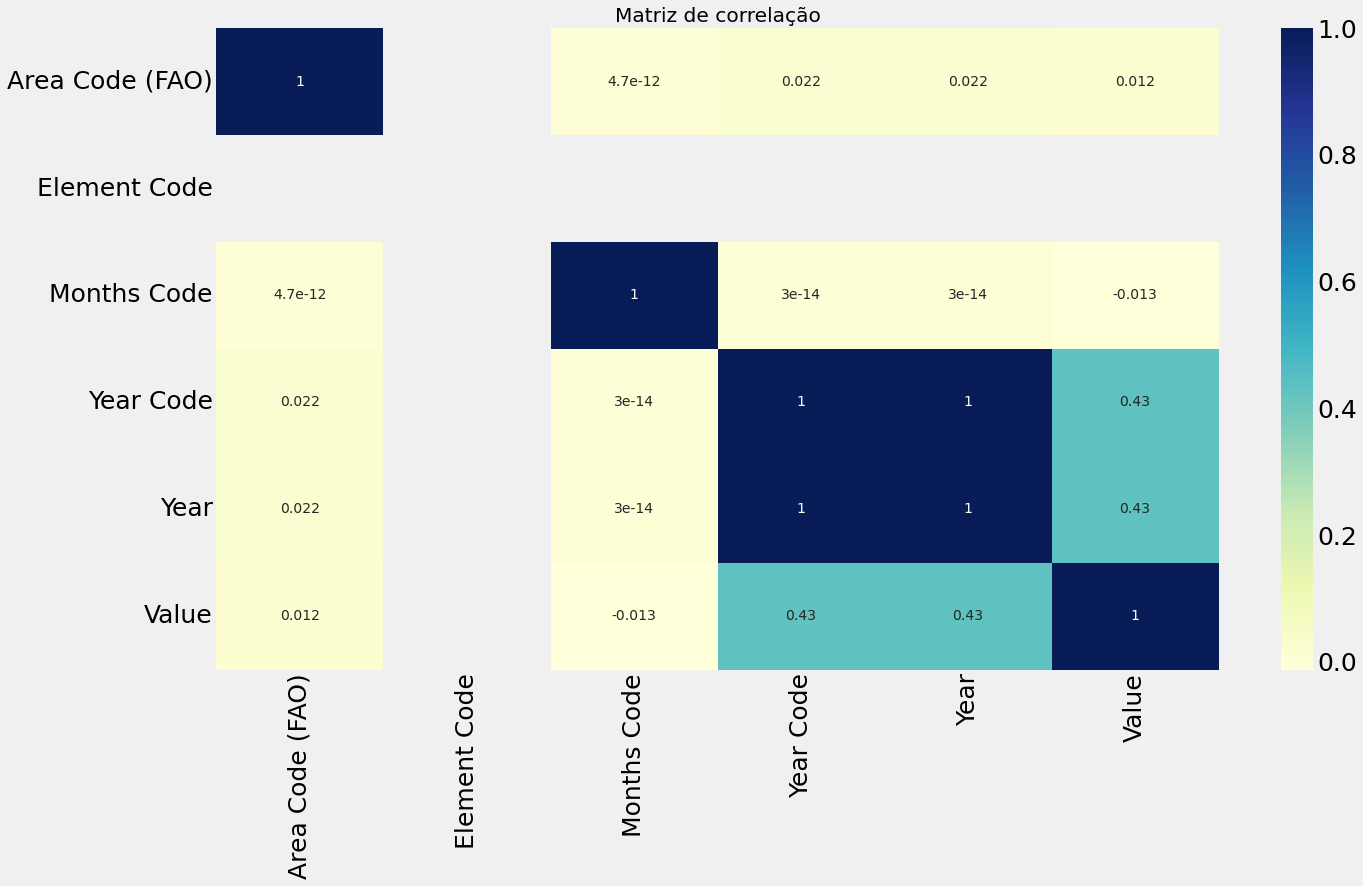

In [29]:
# Gráfico da matriz de correlação

plt.figure(figsize=(20,11))
ax = sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');
plt.title("Matriz de correlação")

In [28]:
# Matriz de correlação interativa 
fig = px.imshow(ds.iloc[:, 1:].corr())
fig.show()

In [60]:
def pre_num(data):
    data = data.copy()
    
    # Removendo
    data = data.query("Element == 'Temperature change'")
    
    # Mean
    data = data.groupby('Area').mean()
    
    # Temperatura
    data = data.loc[:, 'Y1961':]
    
    # Temperatura global
    data = pd.DataFrame(data.mean()).reset_index(drop=False)
    
    # Renomeando dataset
    data.columns = ["Ano", "Temperatura"]
    
    # Ano
    data["Ano"] = data["Ano"].apply(lambda x: x[1:]).astype(np.int)
    return data

time_series = pre_num(ds)
time_series.head()

Ano  Temperatura
0  1961     0.143032
1  1962    -0.028398
2  1963    -0.026297
3  1964    -0.122865
4  1965    -0.224154

In [58]:
# Média movel
media_movel = time_series - time_series.rolling(20).mean()
media_movel = media_movel.dropna()
media_movel.head()

Ano  Temperatura
19  9.5     0.223896
20  9.5     0.217688
21  9.5     0.146812
22  9.5     0.316066
23  9.5     0.033429

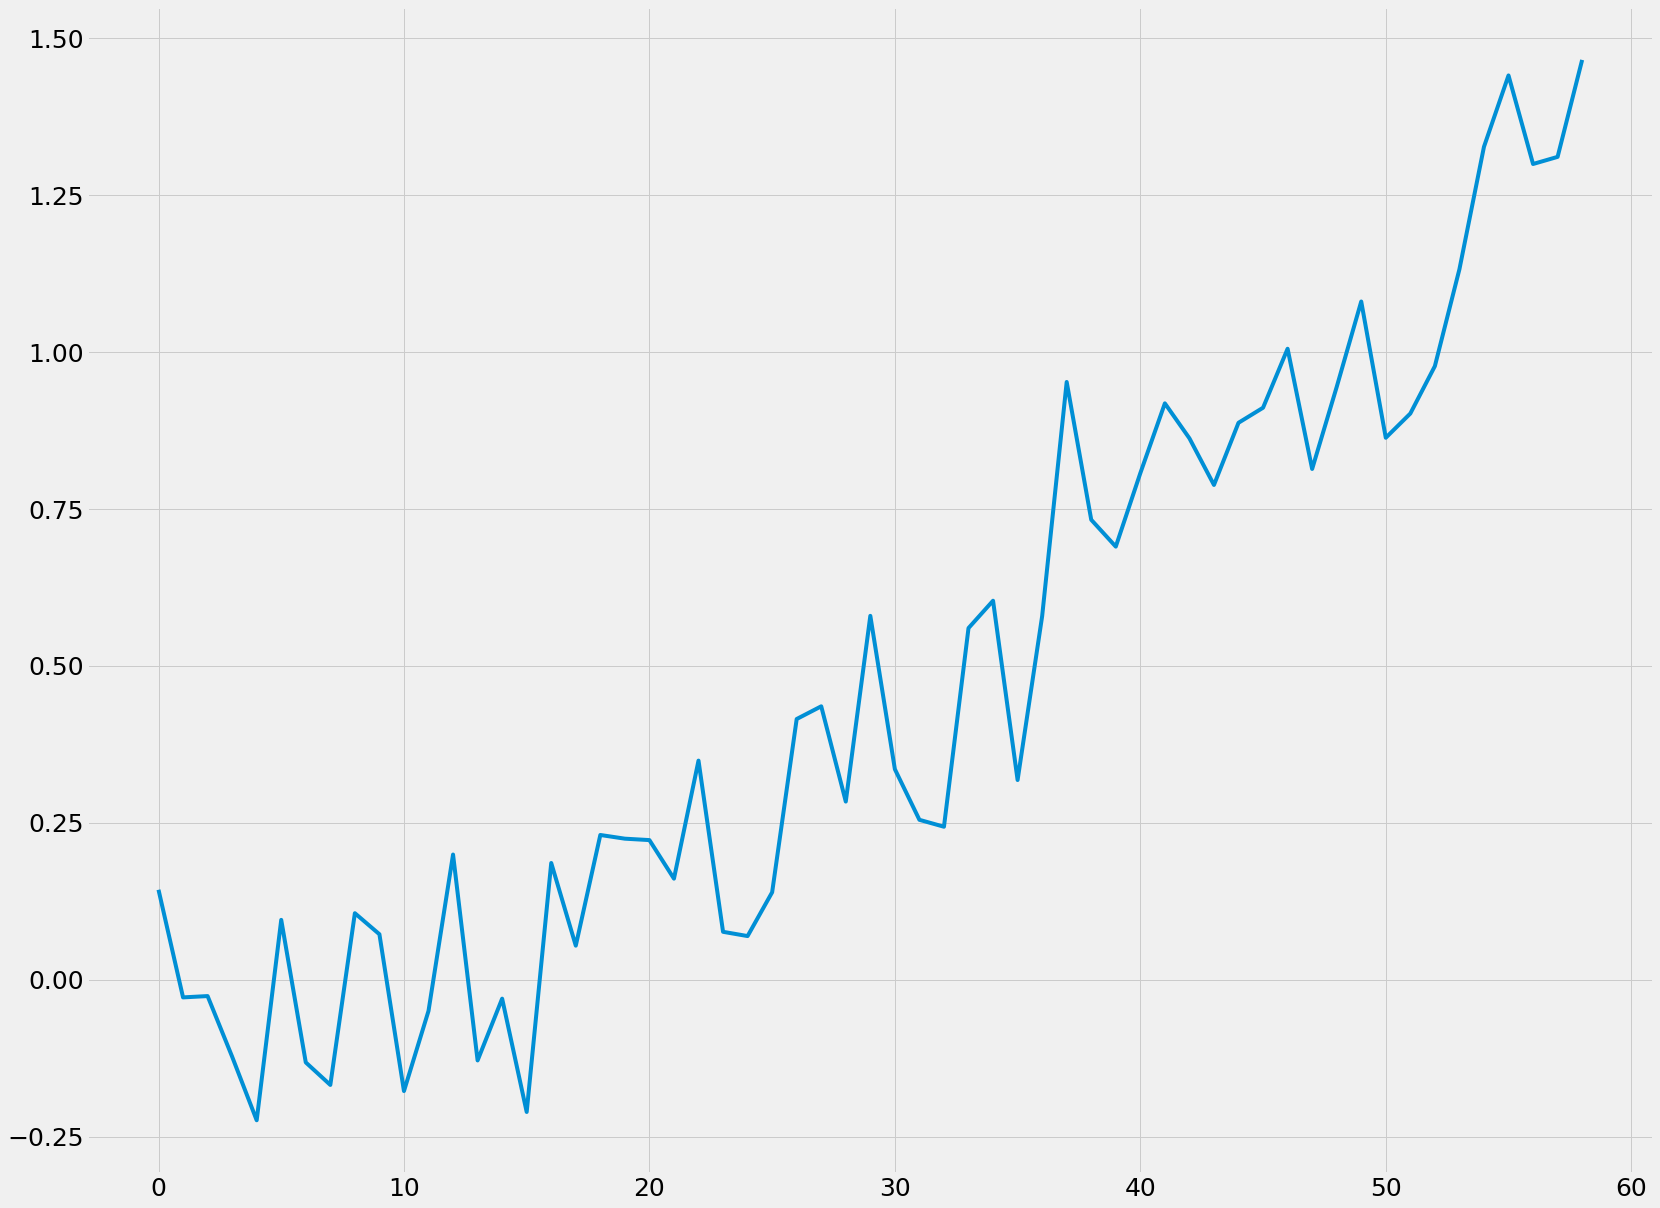

In [100]:
plt.plot(time_series["Temperatura"])

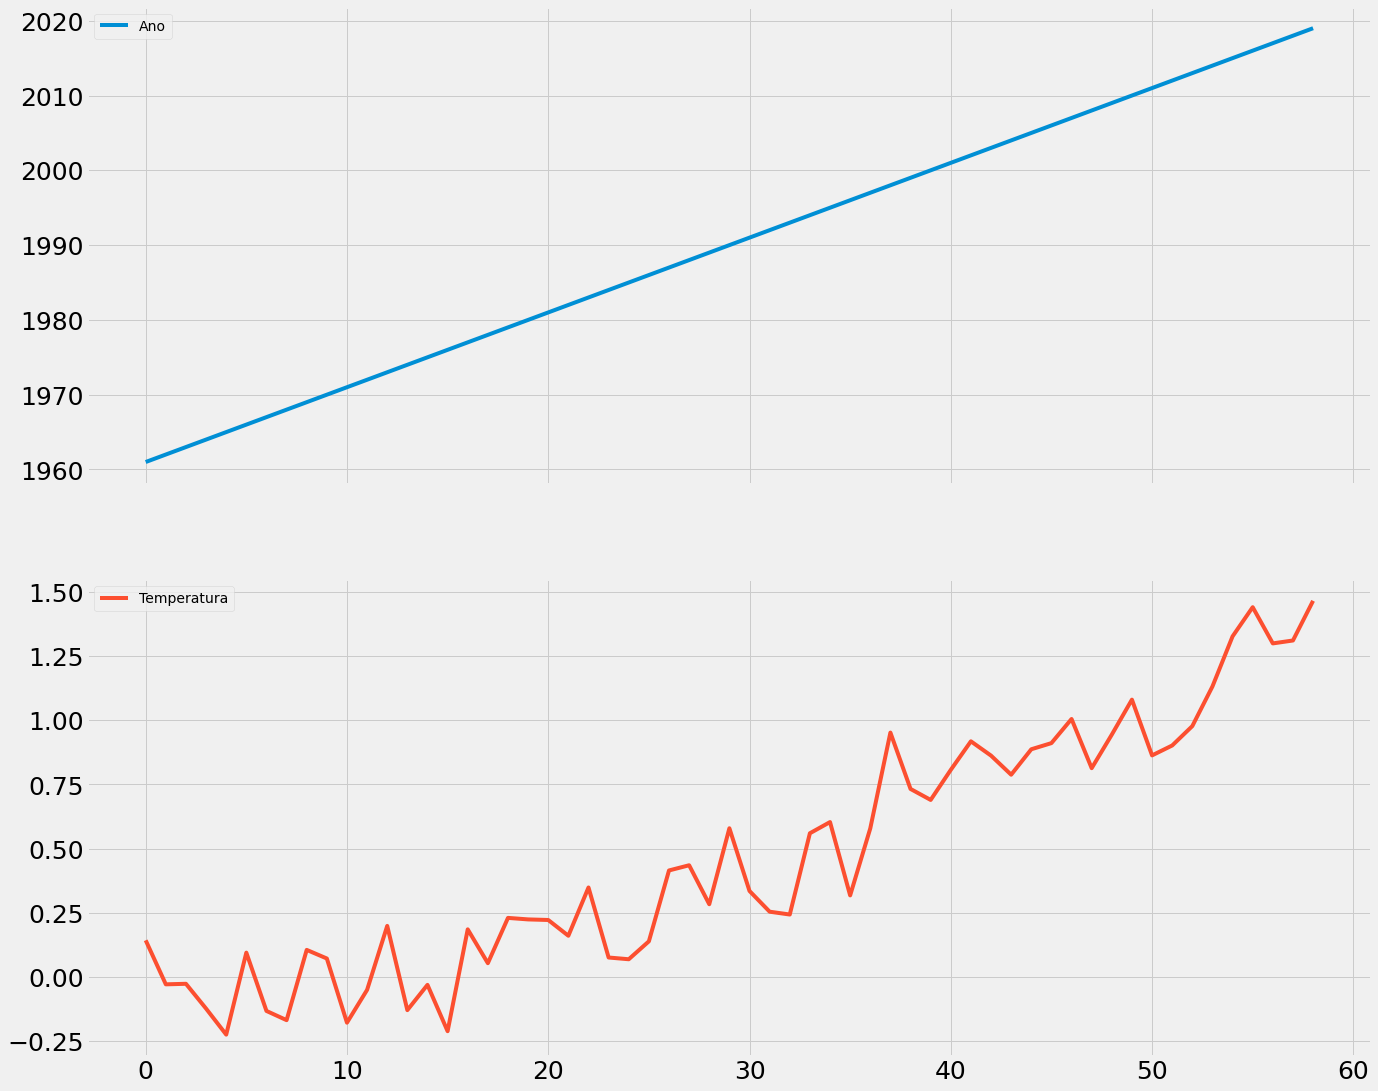

In [44]:
# Plot total
time_series.plot(subplots=True, figsize=(20.5, 18))
plt.show()

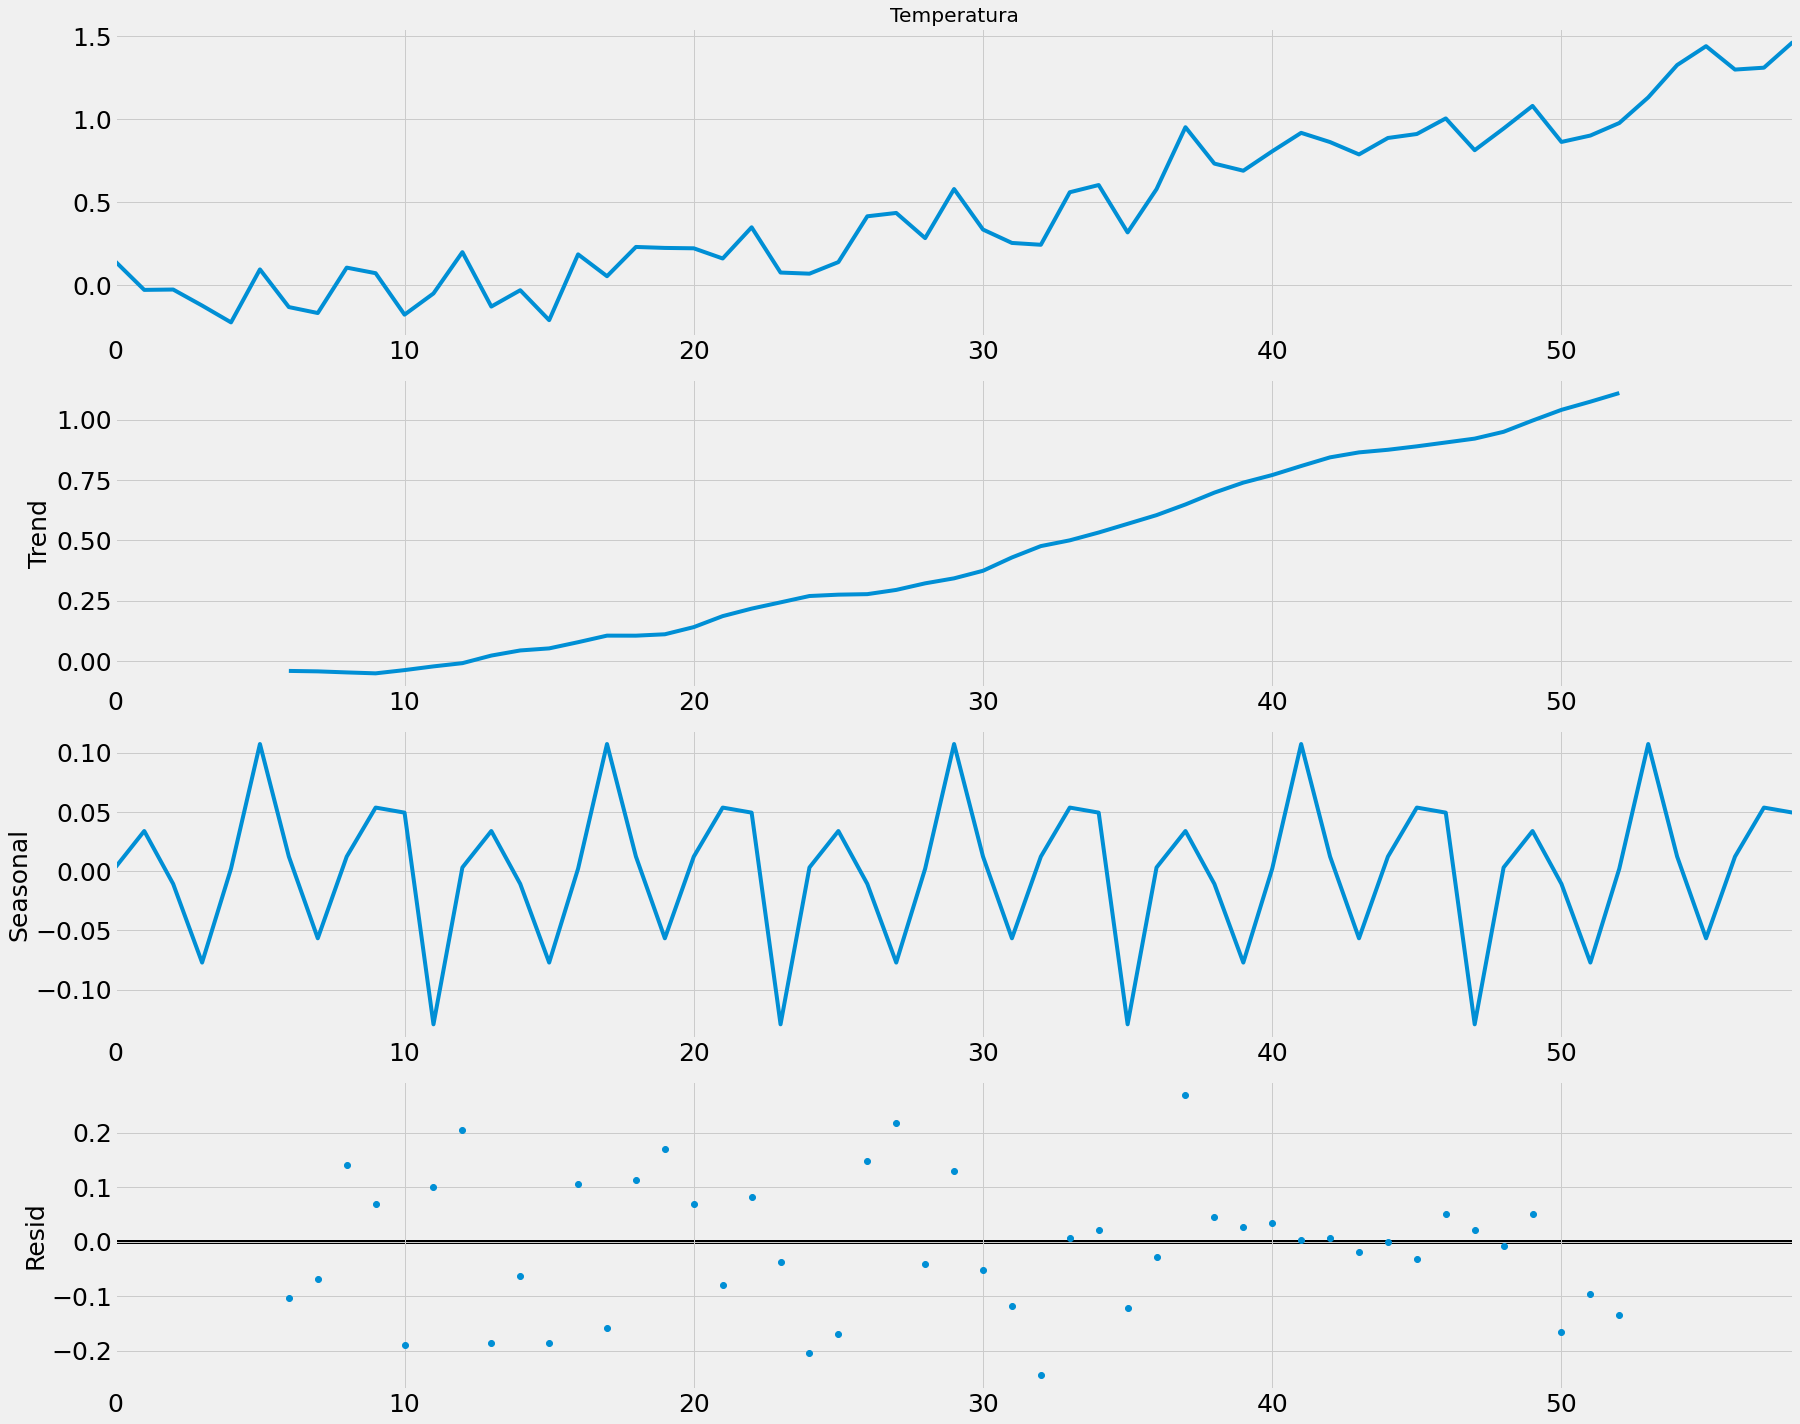

In [43]:
# Importação da biblioteca decomposição sazonal
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposição aditiva
sd = seasonal_decompose(time_series["Temperatura"], freq = 12)
sd.plot()
plt.show()

<AxesSubplot:>

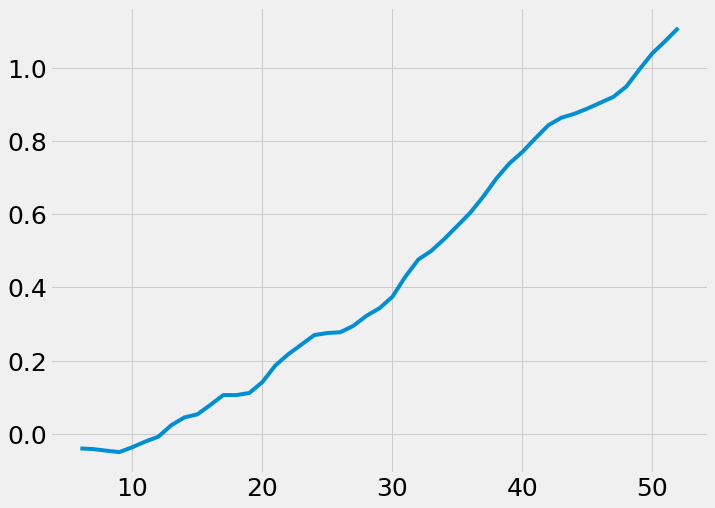

In [49]:
# Padrão de tendência extraído
dt = sd.trend

dt.plot(figsize=(10.5, 8))

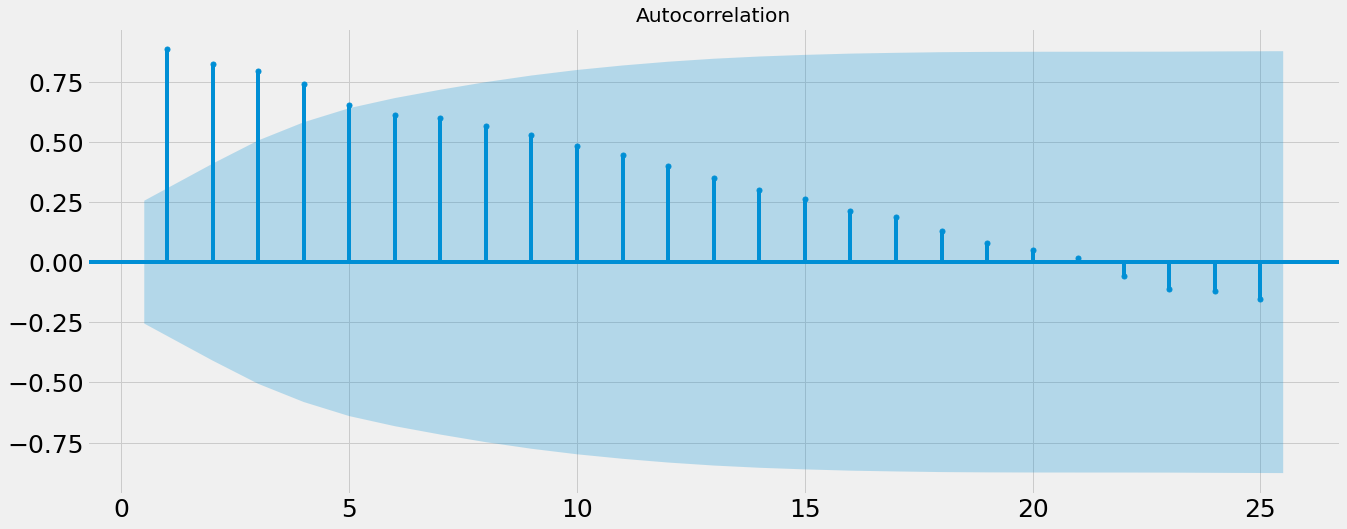

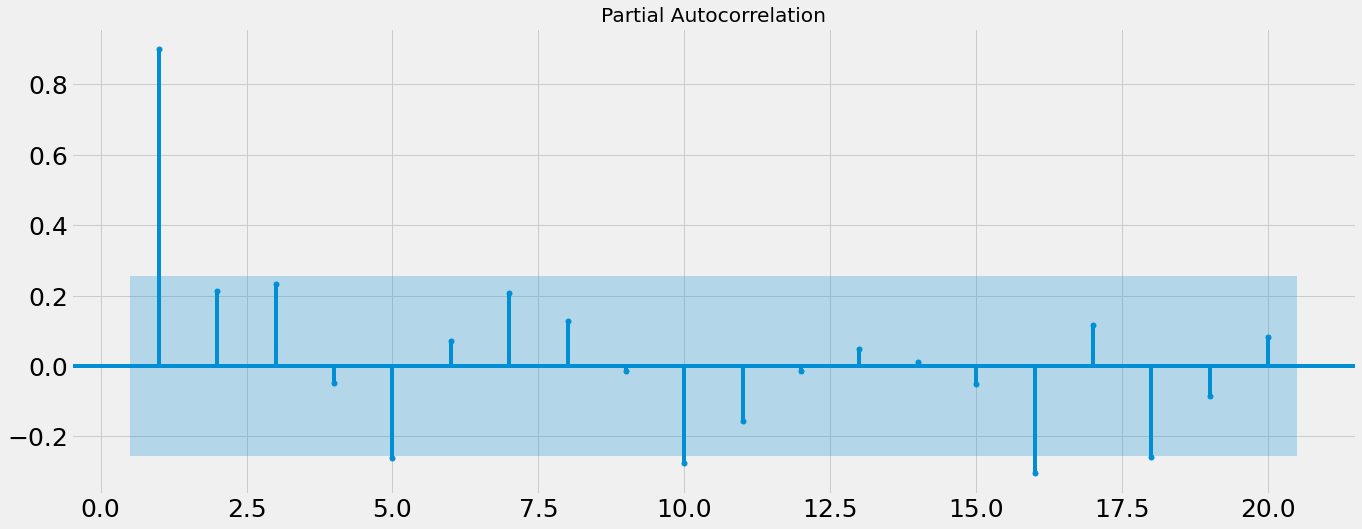

In [56]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(20,8))
plot_acf(time_series["Temperatura"], lags=25, zero=False, ax=ax)
plt.show()

fig, ax1 = plt.subplots(figsize=(20.5, 8))
plot_pacf(time_series["Temperatura"], lags = 20, zero = False, ax = ax1)
plt.show()

# Modelo - ARIMA

O ACF não sazonal não mostra nenhum dos padrões usuais dos modelos MA, AR ou ARMA, então não escolhemos nenhum deles. O Seaosnal ACF e PACF parecem um modelo MA(1). Selecionamos o modelo que combina ambos.

In [109]:
# Modelo ARIMA
from pmdarima.arima import auto_arima

modelo_arima_auto = auto_arima(time_series["Temperatura"],
                               easonal = True, 
                               m = 50, 
                               d = 0, 
                               D = 1, 
                               max_p = 2, 
                               max_q = 2,
                               trace = True, error_action ='ignore',
                               suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[50] intercept   : AIC=16.000, Time=1.96 sec
 ARIMA(0,0,0)(0,1,0)[50] intercept   : AIC=5.704, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[50] intercept   : AIC=3.242, Time=1.85 sec
 ARIMA(0,0,1)(0,1,1)[50] intercept   : AIC=4.254, Time=4.10 sec
 ARIMA(0,0,0)(0,1,0)[50]             : AIC=31.682, Time=0.14 sec
 ARIMA(1,0,0)(0,1,0)[50] intercept   : AIC=1.242, Time=0.57 sec
 ARIMA(1,0,0)(0,1,1)[50] intercept   : AIC=3.242, Time=2.10 sec
 ARIMA(1,0,0)(1,1,1)[50] intercept   : AIC=5.242, Time=3.62 sec
 ARIMA(2,0,0)(0,1,0)[50] intercept   : AIC=2.866, Time=0.56 sec
 ARIMA(1,0,1)(0,1,0)[50] intercept   : AIC=2.959, Time=0.68 sec
 ARIMA(0,0,1)(0,1,0)[50] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(2,0,1)(0,1,0)[50] intercept   : AIC=4.174, Time=1.08 sec
 ARIMA(1,0,0)(0,1,0)[50]             : AIC=2.452, Time=0.43 sec

Best model:  ARIMA(1,0,0)(0,1,0)[50] intercept
Total fit time: 17.861 seconds


In [110]:
# Modelo - Auto ARIMA
modelo_arima_auto

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(0, 1, 0, 50),
      suppress_warnings=True)

In [111]:
# Modelo aic - Maior que anterior modelo
modelo_arima_auto.aic()

1.242260060911856

In [112]:
# Súmario do modelo
print(modelo_arima_auto.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   59
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 50)   Log Likelihood                   2.379
Date:                            Tue, 01 Feb 2022   AIC                              1.242
Time:                                    18:58:28   BIC                              1.834
Sample:                                         0   HQIC                            -0.035
                                             - 59                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2166      0.344      0.630      0.528      -0.457       0.890
ar.L1          0.8096      0.315   

In [113]:
# Previsão do modelo ARIMA
modelo_arima_auto_pred_1 = modelo_arima_auto.predict(n_periods=100)
modelo_arima_auto_pred_1

array([1.38920132, 1.10520468, 1.20526323, 1.43195871, 1.08584272,
       1.1696104 , 0.97722012, 1.36423264, 1.22470723, 1.39471505,
       1.38372293, 1.37733799, 1.3125733 , 1.49787118, 1.22298739,
       1.21443708, 1.28276419, 1.55756777, 1.57687031, 1.42438497,
       1.71958706, 1.47486008, 1.39378842, 1.38244228, 1.69858782,
       1.74195965, 1.45619049, 1.71703143, 2.08997652, 1.87043514,
       1.82758342, 1.94454378, 2.055654  , 1.99996131, 1.92561339,
       2.0246194 , 2.04857417, 2.14250641, 1.95097876, 2.08159219,
       2.21774302, 2.00068369, 2.03926981, 2.114759  , 2.26904137,
       2.46408336, 2.57780302, 2.43672865, 2.44807388, 2.60251197,
       2.52681356, 2.24281604, 2.34287388, 2.56956877, 2.22345232,
       2.30721962, 2.11482903, 2.5018413 , 2.36231569, 2.53232334,
       2.52133109, 2.51494605, 2.45018127, 2.63547908, 2.36059523,
       2.35204487, 2.42037195, 2.69517549, 2.71447801, 2.56199265,
       2.85719472, 2.61246773, 2.53139606, 2.52004991, 2.83619

In [114]:
# Data frame da previsão temperatura
pred_1 = pd.DataFrame(modelo_arima_auto_pred_1,columns=['Previsão'])
pred_1

Previsão
0   1.389201
1   1.105205
2   1.205263
3   1.431959
4   1.085843
..       ...
95  3.601691
96  3.715411
97  3.574336
98  3.585681
99  3.740120

[100 rows x 1 columns]

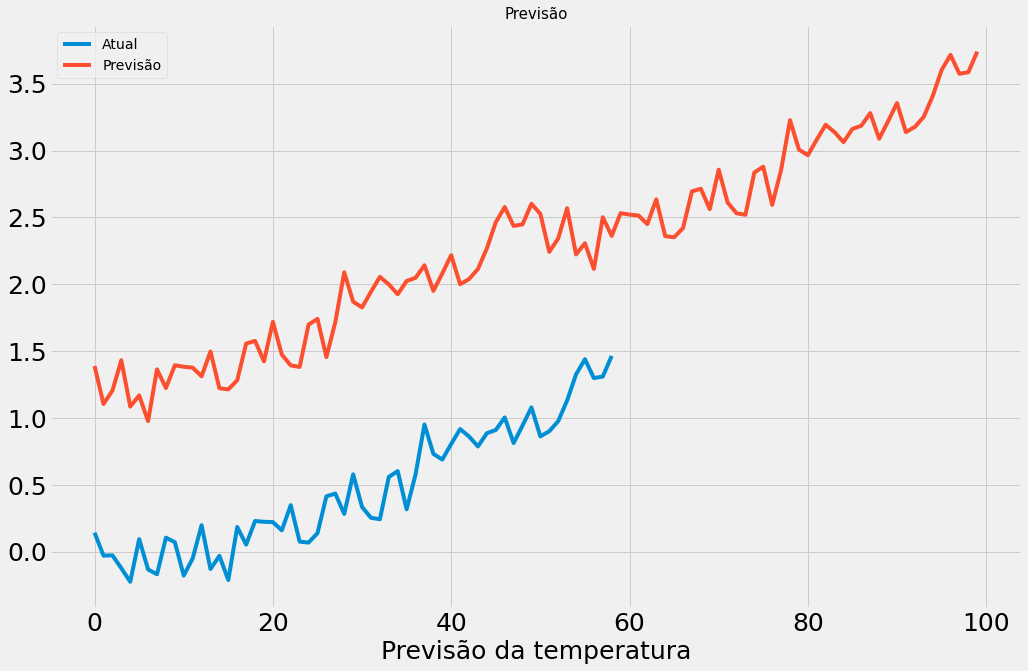

In [115]:
# Gráfico previsão ARIMA
plt.figure(figsize=(15.5, 10))
plt.plot(time_series["Temperatura"])
plt.plot(pred_1["Previsão"])

plt.xlabel('Previsão da temperatura')
plt.legend(["Atual", "Previsão"])
plt.title('Previsão',size=15)
plt.show();

# Model SARIMA

- SARIMA(2, 0, 2)x(2, 1, 0, 12) tem um desempenho melhor que outro modelo de ordens e tem baixo valor de AIC.
- Divida o conjunto de trem e o conjunto de teste do conjunto de dados de trem e ajuste nosso modelo.

In [72]:
x = time_series[:-13] # Variável para treino
y = time_series[-13:] # Variável para teste

In [73]:
# Total de linhas e colunas dados variável x
x.shape

(46, 2)

In [74]:
# Total de linhas e colunas dados variável y
y.shape

(13, 2)

In [87]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Modelo SARIMAX
# Ajuste o modelo SARIMAX ao conjunto de treino

modelo_sarimax = SARIMAX(time_series["Temperatura"], 
                         order = (2,0, 2), 
                         seasonal_order = (2, 1, 0, 12))

modelo_sarimax_fit = modelo_sarimax.fit()
print(modelo_sarimax_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                         Temperatura   No. Observations:                   59
Model:             SARIMAX(2, 0, 2)x(2, 1, [], 12)   Log Likelihood                  12.277
Date:                             Tue, 01 Feb 2022   AIC                            -10.553
Time:                                     18:49:50   BIC                              2.398
Sample:                                          0   HQIC                            -5.680
                                              - 59                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1117      0.858      0.130      0.896      -1.569       1.792
ar.L2          0.8844      

C:\Users\rafae\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



**Modelo SARIMAX**

- Prob(Q) é >0,05, então não rejeitamos a hipótese nula de que os resíduos não são correlacionados. Prob(JB) >0,05, então não rejeitamos a hipótese nula de que os resíduos não são normalmente distribuídos Assim, com base no resumo dado, os Resíduos não são correlacionados e normalmente distribuídos

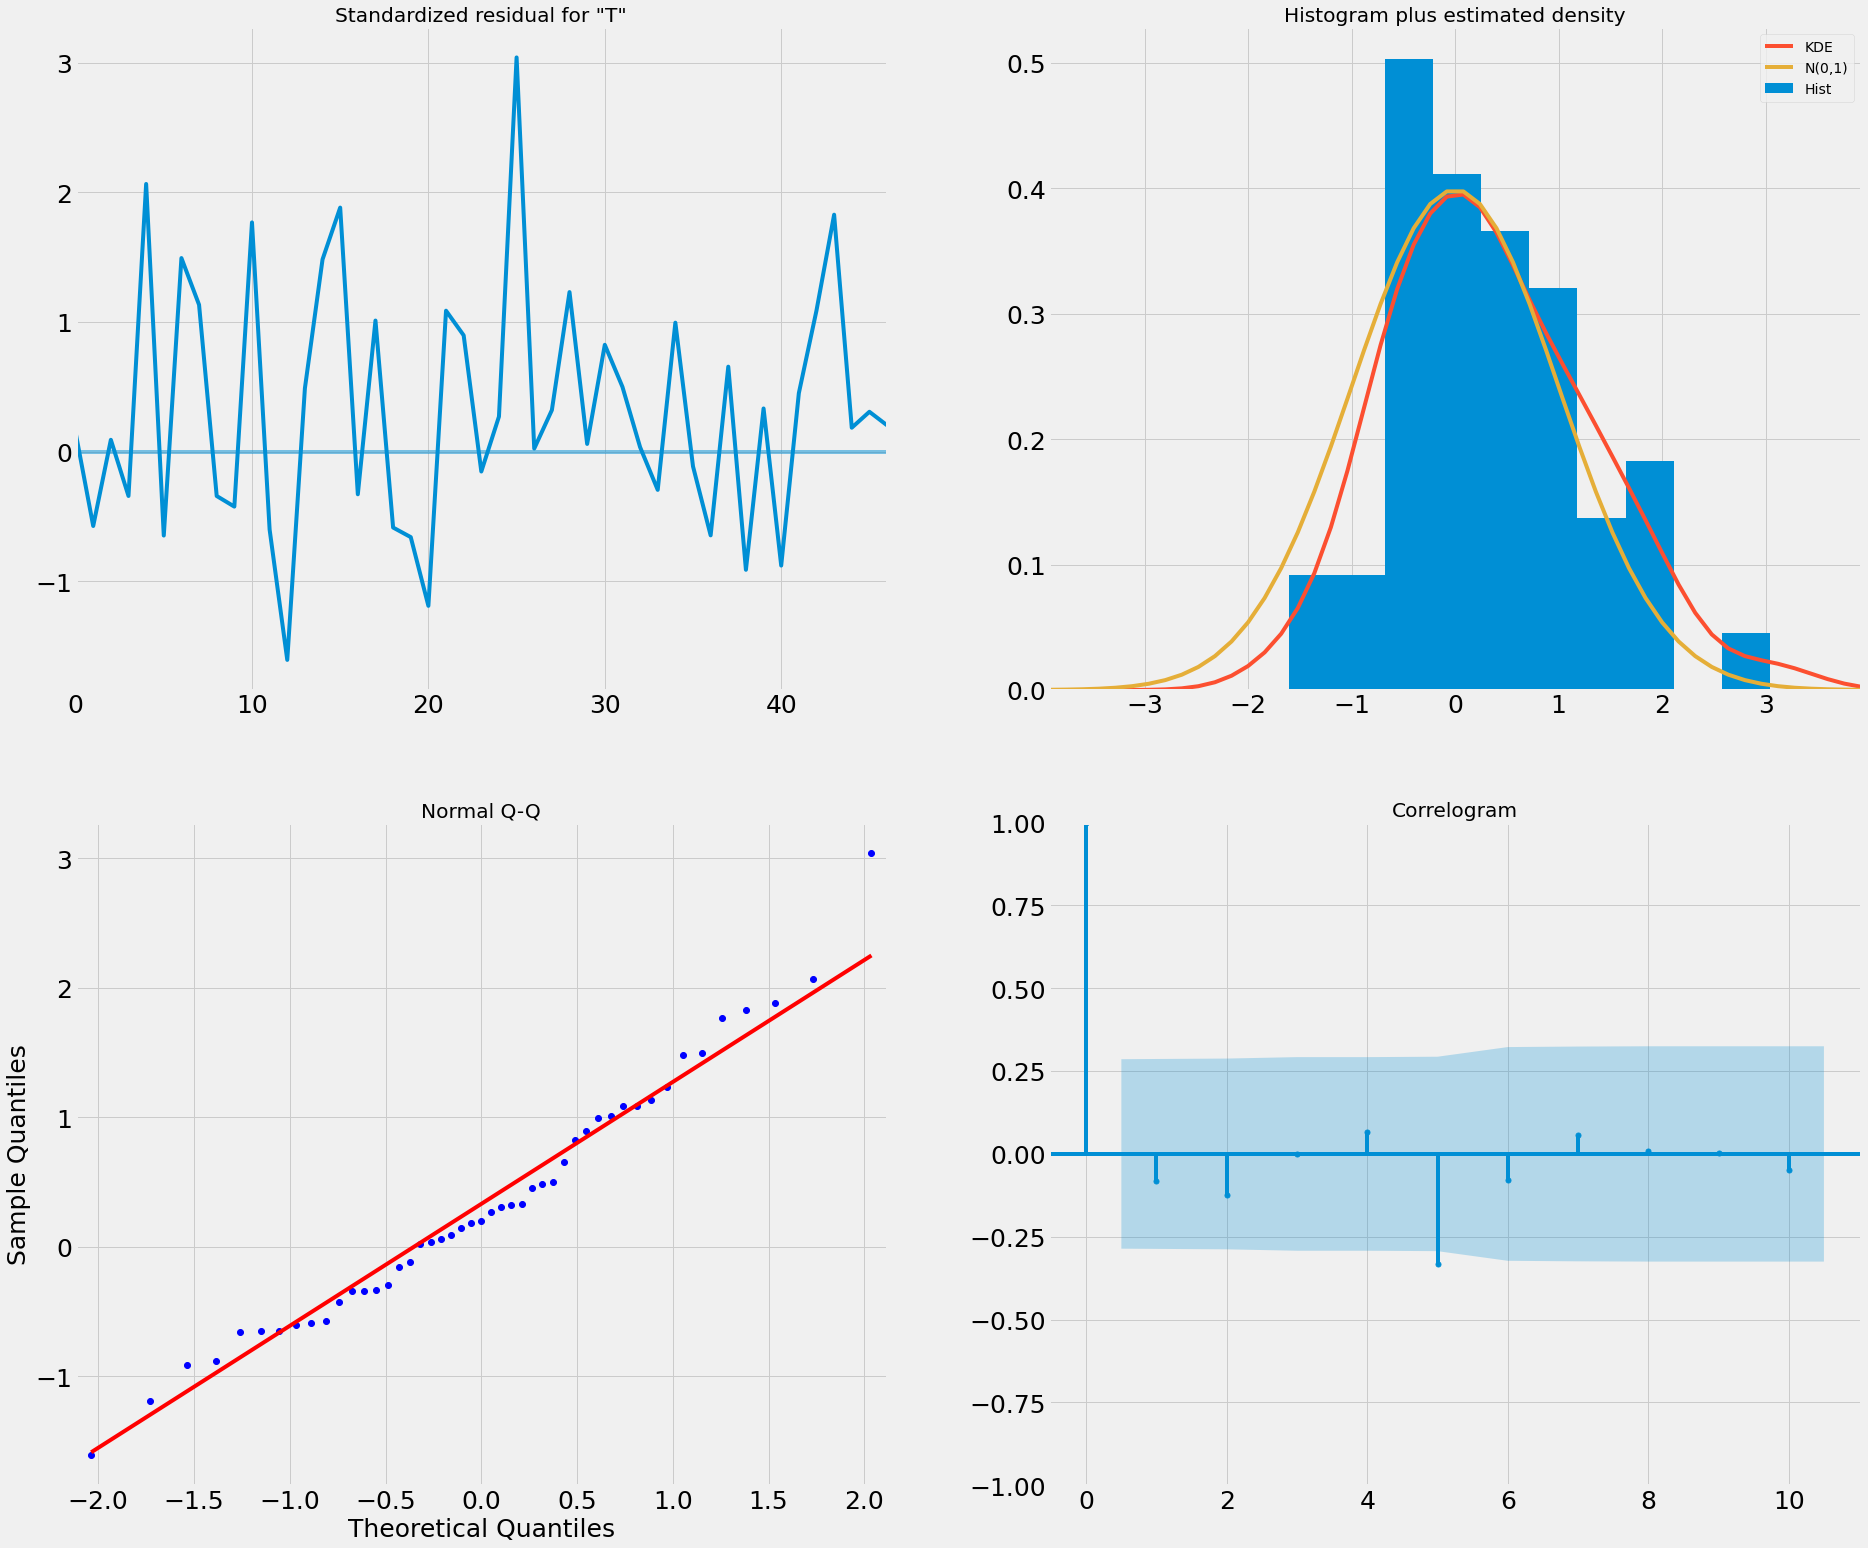

In [81]:
# 4 gráfico diagnóstico do modelo SARIMA

modelo_sarimax_fit.plot_diagnostics(figsize=(28.5, 25))
plt.show()

**Standardized residul**

- O gráfico de resíduos padronizado informa que não há padrões óbvios nos resíduos A curva KDE é muito semelhante à distribuição normal. A maioria dos Datapoints está na linha reta. Além disso, correlações de 95% para atraso maior que um não são significativas Nosso modelo segue um comportamento padronizado. se não, temos que melhorar nosso modelo Prever os valores para o conjunto de teste

In [82]:
# Prever os valores para o conjunto de teste

x_1 = len(x)
y_2 = len(x) + len(y) - 1

pred = modelo_sarimax_fit.predict(start = x_1, end = y_2)
pred

46    0.843899
47    0.831679
48    1.048374
49    0.974096
50    1.010470
51    0.847785
52    1.119280
53    1.058478
54    1.150418
55    1.144598
56    1.269270
57    1.260761
58    1.432042
Name: predicted_mean, dtype: float64

In [86]:
# Previsão 

pred = modelo_sarimax_fit.predict(n_periods=100)
pred = pd.DataFrame(pred)
pred.head()

predicted_mean
0    0.000000e+00
1    1.529534e-08
2    1.185239e-08
3    9.024250e-09
4   -4.372910e-09

In [92]:
# Create SARIMA mean forecast
sarima_forecast = modelo_sarimax_fit.get_forecast(steps=20).predicted_mean
sarima_forecast

59    1.176414
60    1.255791
61    1.364340
62    1.430767
63    1.439657
64    1.399768
65    1.619221
66    1.550088
67    1.529323
68    1.488068
69    1.664064
70    1.753350
71    1.470706
72    1.657868
73    1.911803
74    1.792002
75    1.771145
76    1.830399
77    1.979697
78    1.944178
Name: predicted_mean, dtype: float64

<AxesSubplot:>

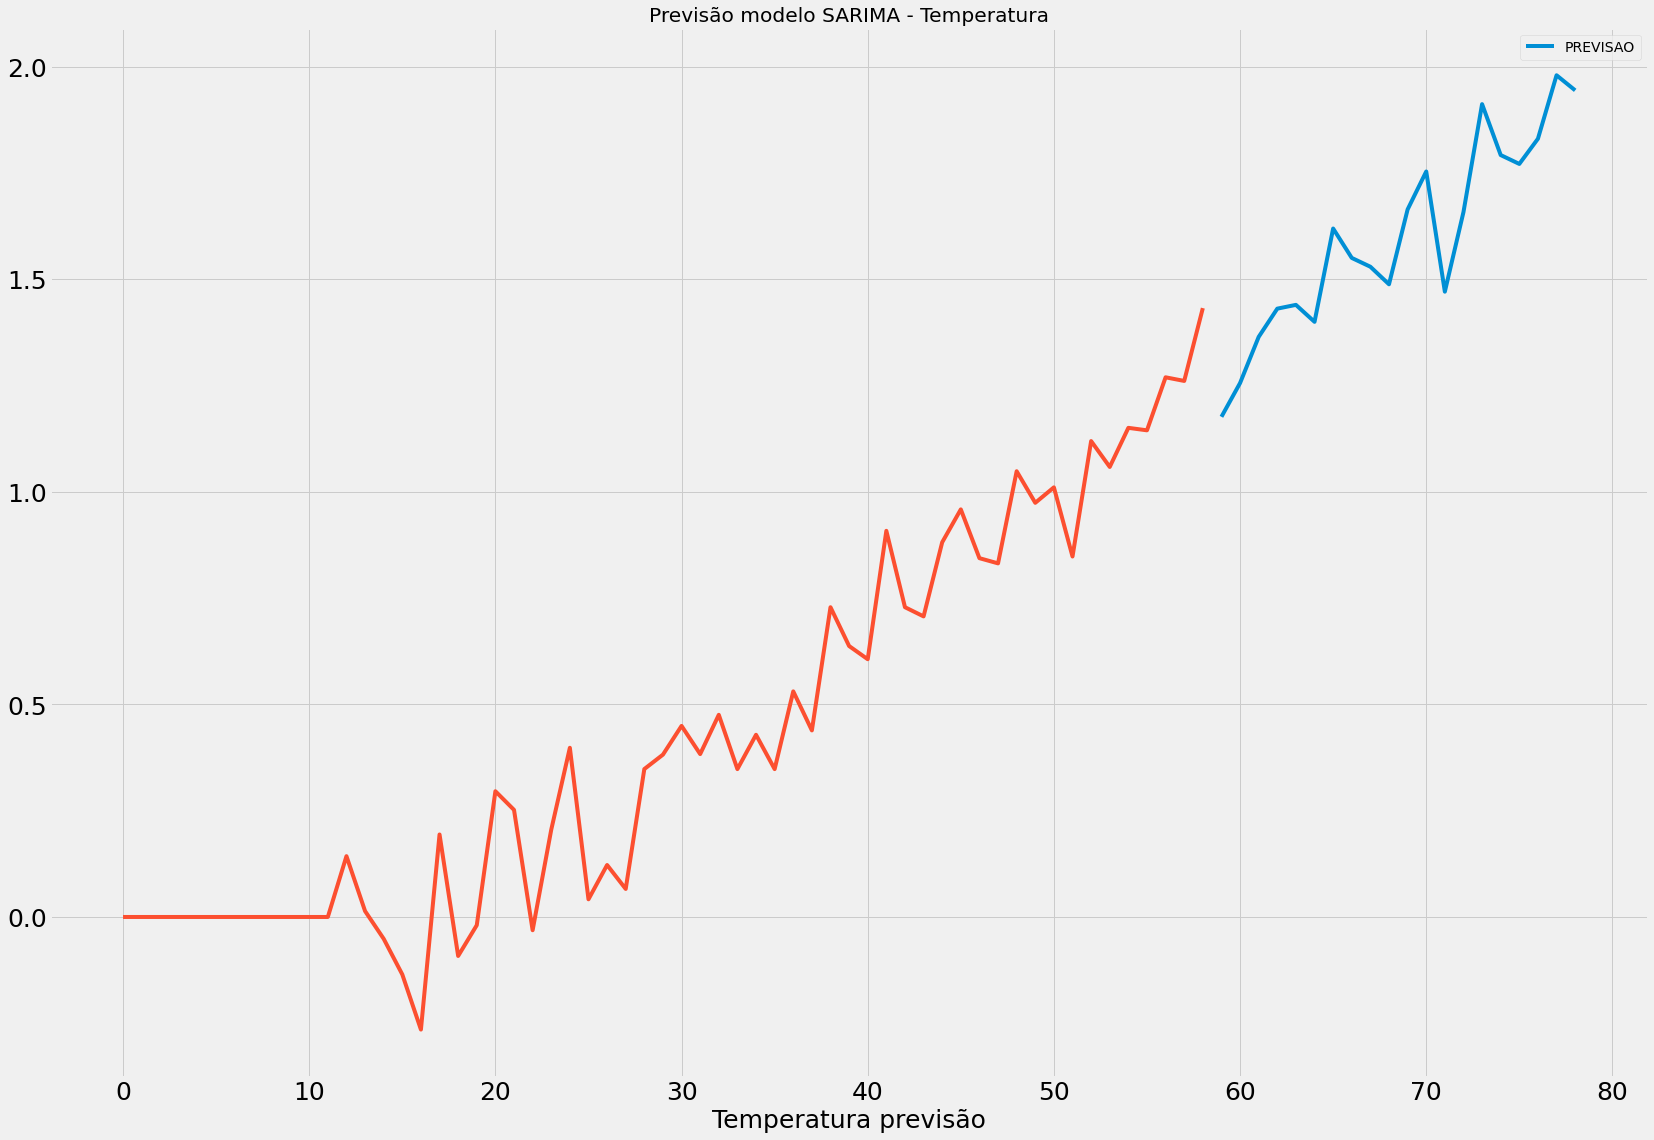

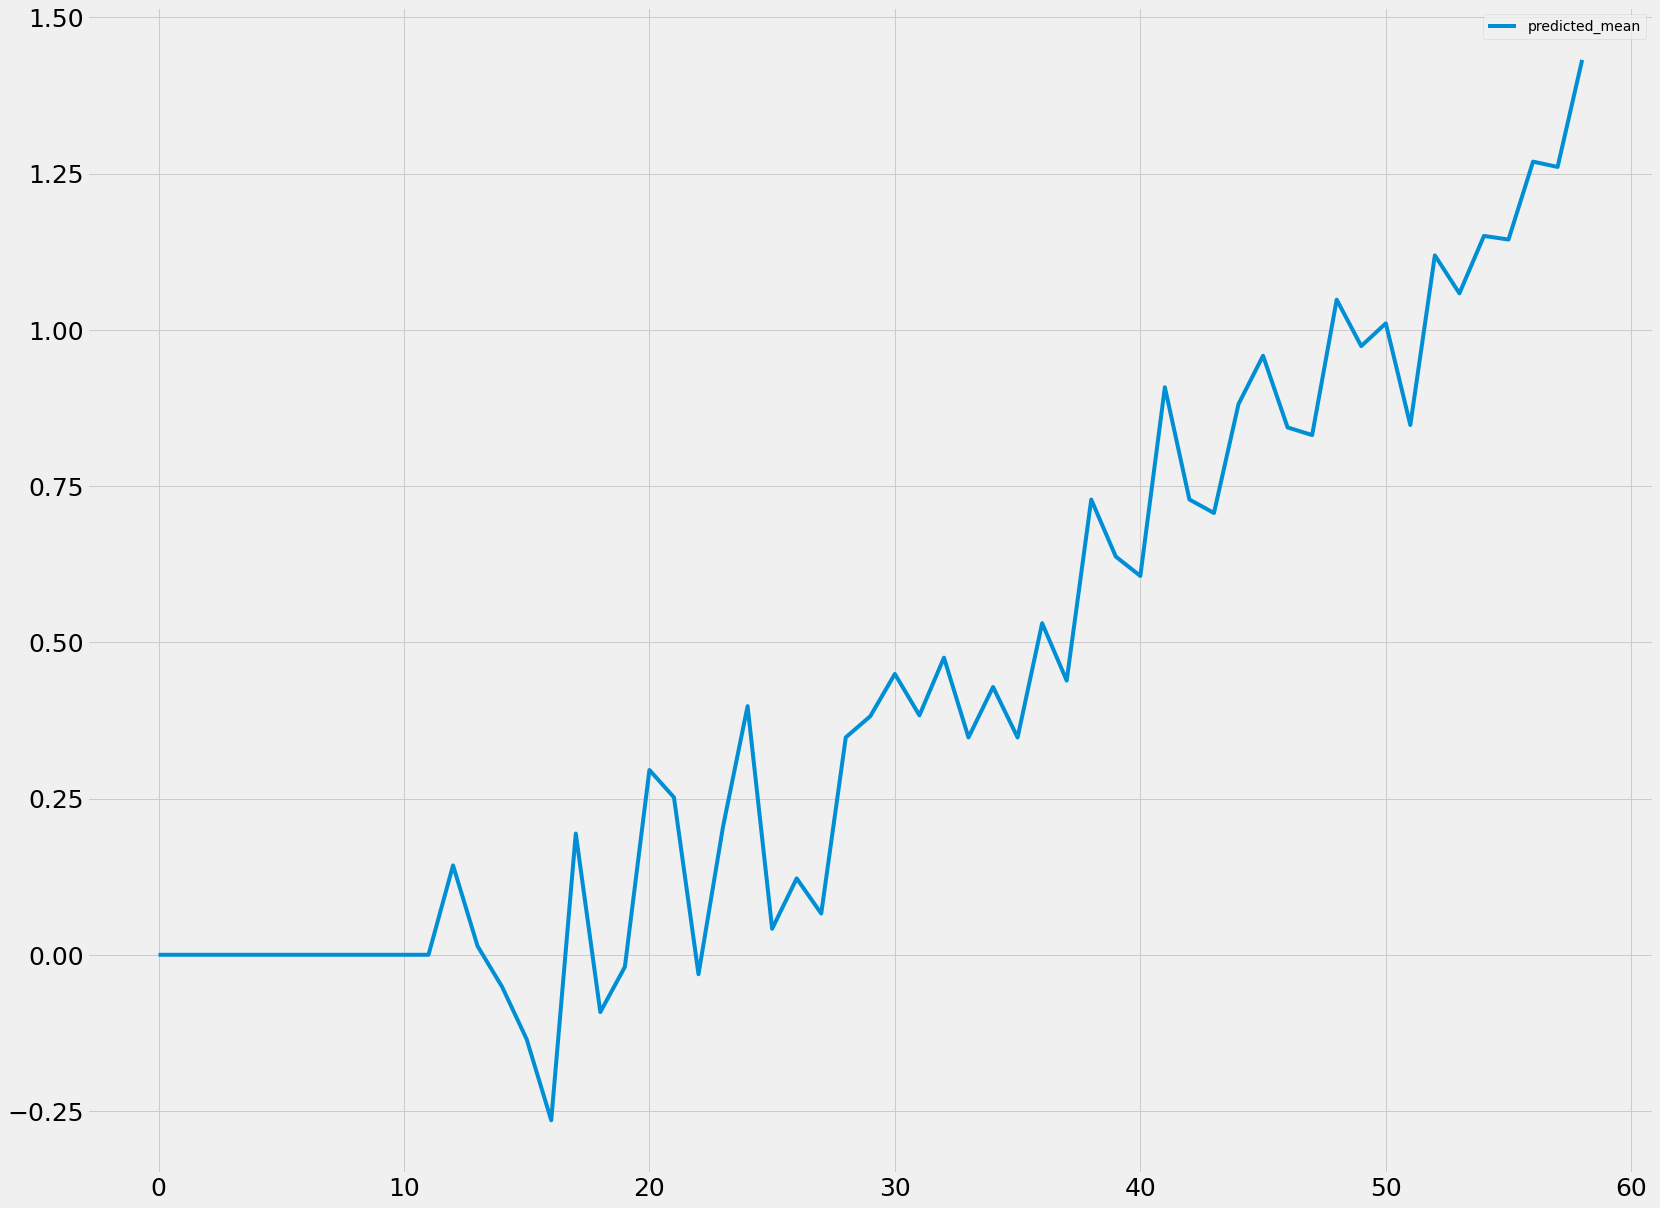

In [99]:
# Previsão gráfico SARIAMA
sarima_forecast.plot(label='PREVISAO',figsize=(25.5, 18), legend=True)
plt.plot(pred["predicted_mean"])
plt.title("Previsão modelo SARIMA - Temperatura")
plt.xlabel("Temperatura previsão")
pred.plot(label='Previsão')

# Métricas para o modelo

- RMSE: Raiz do erro quadrático médio 
- MAE: Erro absoluto médio  
- MSE: Erro médio quadrático
- MAPE: Erro Percentual Absoluto Médio
- R2: O R-Quadrado, ou Coeficiente de Determinação, é uma métrica que visa expressar a quantidade da variança dos dados.

In [90]:
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(time_series["Temperatura"], pred))
mae = mean_absolute_error(time_series["Temperatura"], pred)
mape = mean_absolute_percentage_error(time_series["Temperatura"], pred)
mse = mean_squared_error(time_series["Temperatura"], pred)
r2 = r2_score(time_series["Temperatura"], pred)

pd.DataFrame([rmse, mae, mse, mape, r2], ['RMSE', 'MAE', 'MSE', "MAPE",'R²'], columns=['Resultado'])

Resultado
RMSE   0.178594
MAE    0.138957
MSE    0.031896
MAPE   0.648978
R²     0.855784

# Salvando modelo

In [116]:
# Salvando o modelo em formato em pkl

import pickle

with open('modelo_arima_auto_pred_1.pkl', 'wb') as file:
    pickle.dump(modelo_arima_auto_pred_1, file)
    
with open('pred', 'wb') as file:
    pickle.dump(pred, file)

# Conclusão do modelo machine learning

Nesse modelo foi feito dois modelos ARIMA, SARIMA com os dados de treino, teste, modelo teve uma previsão das temperaturas podemos observar a previsão da temperatura está subindo o nível de Co2. 
Pela análise a temperatura devido efeito estufa. A conclusão é a temperatura em 4 anos vai subir mais ainda.